In [1]:
import pandas as pd
import numpy as np
X = pd.read_csv(r"C:\Users\Najwan\OneDrive\Desktop\0-1_X.csv")
y = pd.read_csv(r"C:\Users\Najwan\OneDrive\Desktop\0-1_y.csv")

In [2]:
X_ = X.values
y_ = y.values

In [3]:
X_

array([[    0,     0,     0, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       ...,
       [14777,     0,     0, ...,     0,     0,     0],
       [14778,     0,     0, ...,     0,     0,     0],
       [14779,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [4]:
y_

array([[    0,     0],
       [    1,     1],
       [    2,     1],
       ...,
       [14777,     1],
       [14778,     0],
       [14779,     1]], dtype=int64)

In [5]:
X_ = X_[:,1:]

In [6]:
y_ = y_[:,1:]

In [7]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [8]:
np.array(X_[0,:]).shape

(784,)

In [9]:
m, n = X_.shape

In [10]:
first_pic = X_[0,:].reshape((28, 28))
first_pic

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

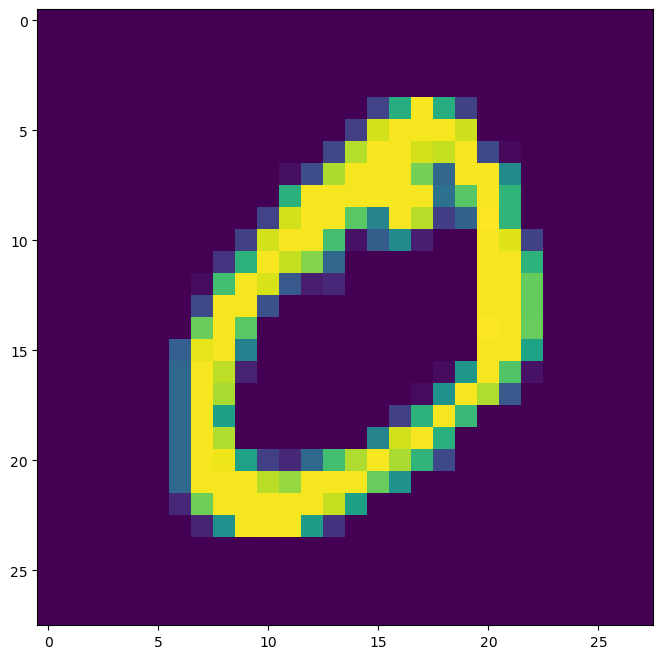

In [11]:
plt.figure(figsize = (8, 8))
plt.imshow(first_pic)

In [12]:
cv2.imwrite(r"C:\Users\Najwan\OneDrive\Desktop\zero.JPG", first_pic)

True

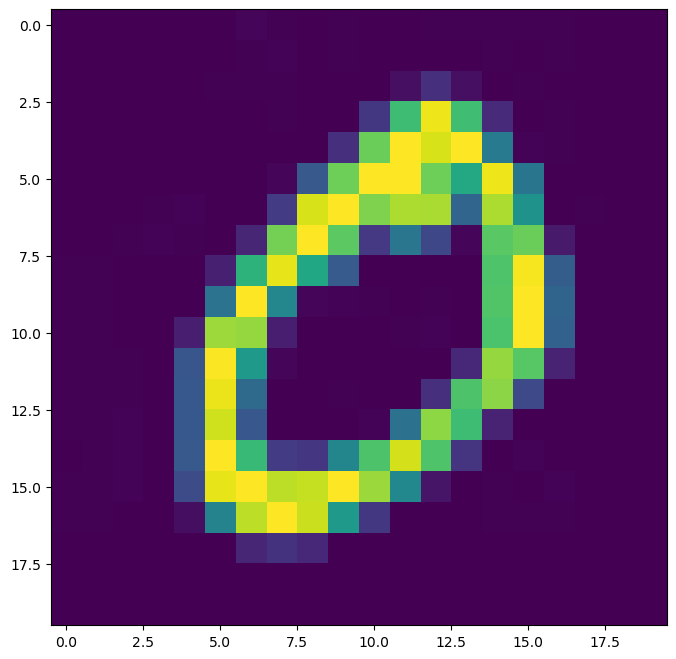

In [13]:

# fist_pic = arr_2.reshape((20,20))
# plt.figure(figsize = (8, 8))
# plt.imshow(first_pic)
img = Image.open(r"C:\Users\Najwan\OneDrive\Desktop\zero.JPG")
resized_im = img.resize((20,20))
arr_1 = np.array(resized_im)

# arr_1
third_pic = arr_1.reshape((20,20))
plt.figure(figsize = (8, 8))
plt.imshow(third_pic)

Reducing the number of pixels of image from 784 (28,28) into 400 (20, 20)

In [14]:

reduced_X = np.zeros((X_.shape[0], 400))

for k in range(0, X_.shape[0]):
    r = 20
    c = 20
    
    first_pic = X_[k,:].reshape((28,28))
    r_ratio, c_ratio = first_pic.shape[0]/r, first_pic.shape[1]/c
    reduced_pic = np.zeros((r, c))
    for i in range(0,r):
        for j in range(0,c):
            ii = int(i * r_ratio)
            jj = int(j * c_ratio)
            # block = first_pic[i*r_ratio:(i+1)*c_ratio,j*r_ratio:(j+1)*c_ratio]
            # reduced_pic[i, j] = np.mean(block)
            reduced_pic[i, j] = first_pic[ii, jj]
            new = np.array(reduced_pic.flatten())
            ## reduced_pic[i, j] = int(np.mean(np.array(first_pic[i:9+i,j:9+j])))
    reduced_X[k,:] = new

In [16]:
X_.shape

(14780, 784)

In [17]:
reduced_X.shape

(14780, 400)

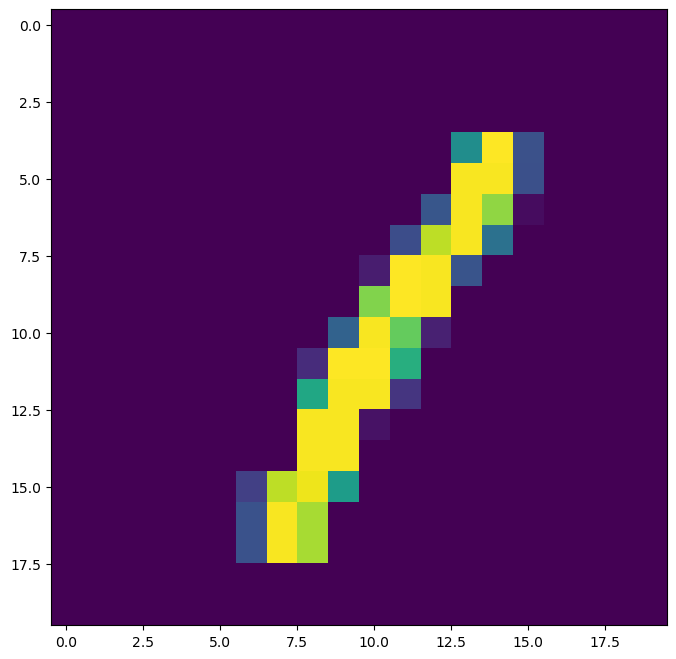

In [18]:
plt.figure(figsize = (8, 8))
plt.imshow(reduced_X[1,:].reshape((20,20)))


Splitting the dataset

In [19]:
from sklearn.utils import column_or_1d
y_ = column_or_1d(y_)

In [20]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
print(reduced_X.shape, y_.shape)

(14780, 400) (14780,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(reduced_X, y_, test_size = 0.4, random_state = 21)

In [23]:
X_train.shape, X_test.shape

((8868, 400), (5912, 400))

Perform PCA to dimensionality reduction

In [24]:
pca = PCA(n_components = 2)

In [25]:
X_test_, X_val, y_test_, y_val = train_test_split(X_test, y_test, test_size = 0.25, random_state = 21)
X_train_pca = pca.fit_transform(X_train)
X_test_pca_ = pca.transform(X_test_)

In [26]:
pca_comp = pca.components_
pca_comp.T.shape

(400, 2)

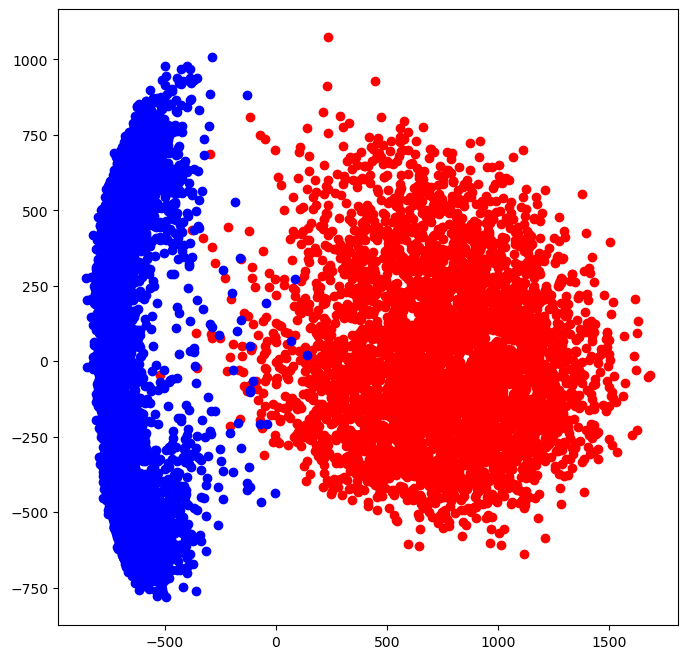

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
plt.scatter(x = X_train_pca[np.where(y_train==0)[0],0], y = X_train_pca[np.where(y_train==0)[0],1],c = "red", cmap = 'viridis')
plt.scatter(x = X_train_pca[np.where(y_train==1)[0],0], y = X_train_pca[np.where(y_train==1)[0],1],c = "blue", cmap = 'viridis')
plt.show()

In [28]:
type(pca_comp)

numpy.ndarray

In [29]:
np.where(y_train==0)[0]

array([   0,    1,    4, ..., 8853, 8861, 8867], dtype=int64)

In [30]:
y_train.shape

(8868,)

fit the model

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(X_train_pca, y_train)

LogisticRegression()

In [33]:
y_.shape

(14780,)

In [34]:
X_train_pca.shape

(8868, 2)

Predict the results using fitted model

In [35]:
ypred = lr.predict(X_test_pca_)

In [36]:
import pandas as pd
df = pd.DataFrame(y_test_, columns = ["test results"])
df["predicted results"] = ypred
df

,test results,predicted results
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
4429,1,1
4430,0,0
4431,0,0
4432,1,1


In [37]:
ind = df.index[df["test results"]!=df["predicted results"]]

In [38]:
ind

Int64Index([1190, 1491, 2292, 2860, 3315, 3464, 3746], dtype='int64')

In [39]:
ind.shape

(7,)

In [40]:
df[df["test results"]!=df["predicted results"]]

,test results,predicted results
1190,0,1
1491,0,1
2292,0,1
2860,0,1
3315,0,1
3464,1,0
3746,1,0


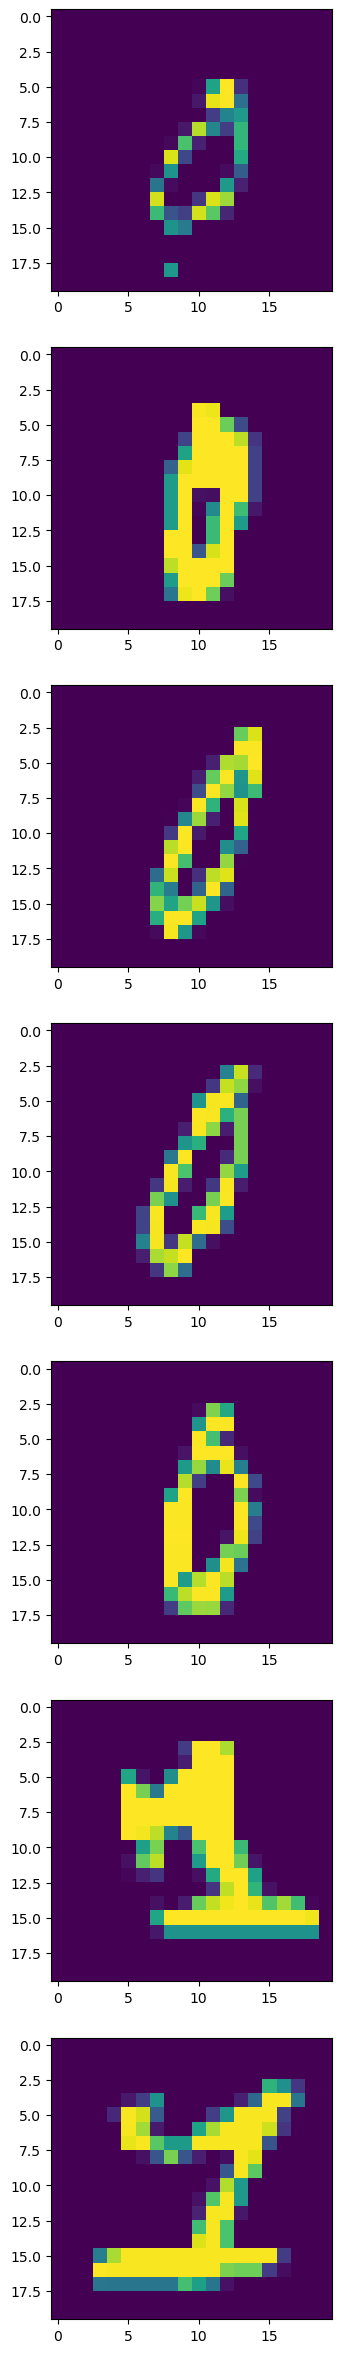

In [41]:
# plt.figure(figsize= (8,8))
fig, ax = plt.subplots(ind.shape[0],1, figsize = (30,30))
for i in range(X_test_[ind].shape[0]):
    pic = X_test_[ind][i,:].reshape((20,20))
    ax[i].imshow(pic)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
(df.shape[0] - ind.shape[0])/ df.shape[0]

0.9984212900315742

In [44]:
accuracy = accuracy_score(y_test_, ypred)
accuracy

0.9984212900315742

Validate the model using validation set

In [45]:
X_val_pca = pca.transform(X_val)

In [46]:
y_pred = lr.predict(X_val_pca)

In [47]:
dff = pd.DataFrame(y_val, columns = ["val_results"])
dff["pred_results"] = y_pred
dff

,val_results,pred_results
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
1473,1,1
1474,0,0
1475,1,1
1476,0,0


In [48]:
dff[dff["val_results"]!=dff["pred_results"]]

,val_results,pred_results
257,0,1
472,1,0
584,0,1
605,0,1
814,0,1
956,1,0
1017,0,1
1191,0,1


In [49]:
indc = dff.index[dff["val_results"]!=dff["pred_results"]]

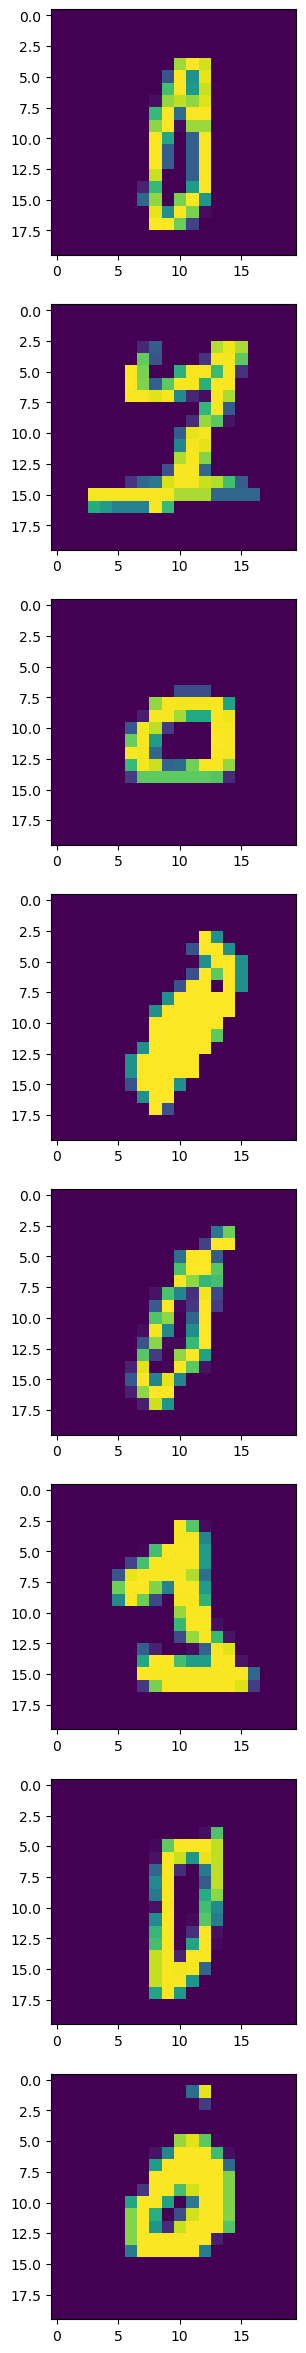

In [50]:
fig, ax = plt.subplots(indc.shape[0],1, figsize = (30,30))
for i in range(indc.shape[0]):
    pics = X_val[indc][i,:].reshape((20,20))
    ax[i].imshow(pics)

In [51]:
indc.shape[0]

8

In [52]:
accuracy_val = accuracy_score(y_val, y_pred)
print(f"accuracy score of test set : {accuracy}, validation set : {accuracy_val}")

accuracy score of test set : 0.9984212900315742, validation set : 0.9945872801082544


In [53]:
X_test_.shape, X_val.shape, X_train.shape

((4434, 400), (1478, 400), (8868, 400))